# Exemples de classification avec scikit-learn

On va effectuer un apprentissage supervisé multi-classes avec différentes méthodes de la librairie **scikit-learn** :
- Régression logistique
- Arbres de décision
- Forêts d'arbres décisionnels
- K plus proches voisins
- Algorithme du gradient stochastique
- Machine à vecteurs de support
- Classification naïve bayésienne
- Réseau de neuronnes

Avec **scikit-learn**, le principe est toujours le même :
- Matrice de données *X* et vecteur d'étiquettes *y*
- Séparation des bases d'apprentissage et de test : *X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, ...)*
- Instanciation d'un algorithme de classification : *algo = XClassifier(...)*
- Apprentissage sur la base d'apprentissage : *algo.fit(X_train, y_train)*
- Prédiction sur la base de test : *y_pred = algo.predict(X_test)*
- Calcul de la performance en comparant y_pred avec y_test : *accuracy_score(y_test, y_pred)*

In [1]:
# imports usuels
import numpy as np
import pandas as pnd
import matplotlib.pyplot as plt
%matplotlib inline

# chargement des algorithmes scikit-learn
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
#from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC
from sklearn.linear_model import SGDClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.neural_network import MLPClassifier

# utilisatires scikit-learn
from sklearn.datasets import fetch_mldata
from sklearn import model_selection
from sklearn.metrics import accuracy_score

# timer
import timeit

## Chargement des données

Cet exemple utilise un dataset du MNIST voir : http://yann.lecun.com/exdb/mnist/

The MNIST database of handwritten digits, available from this page, has a training set of 60,000 examples, and a test set of 10,000 examples. It is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image.

In [2]:
from IPython.display import IFrame
IFrame("http://yann.lecun.com/exdb/mnist/", 800, 400)

In [3]:
# import du dataset de 70.000 images en niveau de gris
# écriture manuscripte des chiffres de 0 à 9
# images étiquettées
mnist = fetch_mldata("MNIST original")

# rescale the data
X, y = mnist.data / 255., mnist.target

print(X.shape, y.shape)

(70000, 784) (70000,)


In [4]:
# images carrées de 28 x 28 pixels
np.sqrt(784)

28.0

## Affichage des données

In [5]:
# adapté du MOOC machine learning Coursera Octave displayData.m
# et étendu avec l'affichage des chiffres en parallèle des images
# et également des écarts des prédictions

def display_data(X, y=None, y_predict=None):
    example_width = int(np.sqrt(X.shape[1]))

    # Compute rows, cols
    m, n = X.shape
    example_height = int(n / example_width)

    # Compute number of items to display
    display_rows = int(np.floor(np.sqrt(m)))
    display_cols = int(np.ceil(m / display_rows))

    # Between images padding
    pad = 1

    # Setup blank display
    display_array = - np.ones((pad + display_rows * (example_height + pad),\
                           pad + display_cols * (example_width + pad)))

    # Copy each example into a patch on the display array
    # dataset contains N pixel by N pixel grayscale images of the digit 
    curr_ex = 0
    for j in range(display_rows):
        for i in range(display_cols):
            if curr_ex >= m:
                break
            # Get the max value of the patch
            max_val = max(abs(X[curr_ex]))
            display_array[(pad + j * (example_height + pad)):(pad + j * (example_height + pad))+example_height,\
                          (pad + i * (example_width + pad)):(pad + i * (example_width + pad))+example_width] =\
                            np.reshape(X[curr_ex], (example_height, example_width)) / max_val
            curr_ex += 1
        if curr_ex >= m:
            break 

    plt.figure()
    plt.axis('off')
    plt.imshow(display_array, cmap="Greys_r")
    
    if y is not None: # étiquettes des données en entrée
        df = pnd.DataFrame(y.reshape((display_rows, display_cols)))
        df = df.astype(int)
        print(df.to_string(index=False, header=False))
        
    if y_predict is not None: # étiquettes des données en sortie (écart / entrée)
        print('-'*(display_cols*3-2))
        z = pnd.Series(y).combine(pnd.Series(y_predict), func=lambda x, y: y if y != x else -1)
        df = pnd.DataFrame(z.values.reshape((display_rows, display_cols)))
        df = df.astype(int, ignore=True)
        df.replace(to_replace=-1, value='.', inplace=True)
        print(df.to_string(index=False, header=False))

5  3  6  0  3  8  5  5  5  6
8  7  5  8  9  2  6  2  1  3
8  9  1  5  3  0  2  5  9  9
3  1  5  5  2  6  5  7  2  4
5  4  7  5  5  8  9  0  2  9
7  8  0  4  8  3  5  0  0  1
4  0  8  9  7  4  3  4  2  7
5  1  6  4  4  8  3  9  3  7
0  8  2  5  7  5  7  6  5  7
2  5  5  8  1  3  2  1  2  4


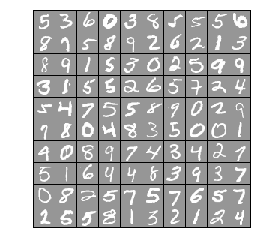

In [6]:
# affichage aléatoire de 100 images et des chiffres correspondants
rnd = np.random.permutation(X.shape[0])[0:100]
sel = X[rnd,:]
res = y[rnd]
display_data(sel, res)

## Préparation du dataset : training set / test set

In [7]:
# use the traditional train/test split
X_train, X_test, y_train, y_test = model_selection.train_test_split(X,y,test_size=60000,random_state=0)

## Fonction d'exécution générale

In [8]:
# fonction d'exécution générale

algos = [] # liste des algorithmes employés
df = pnd.DataFrame() # tableau des résultats

def run(algo):
    global algos, df
    
    start = timeit.default_timer() # start chrono

    algo.fit(X_train, y_train) # algorithme d'apprentissage automatique

    y_pred = algo.predict(X_train) # prédictions sur le train set
    acc_train = accuracy_score(y_train, y_pred)
    print("Accuracy on train set: %f" % acc_train)
    
    y_pred = algo.predict(X_test) # prédictions sur le test set
    acc_test = accuracy_score(y_test, y_pred)
    print("Accuracy on test set:  %f" % acc_test)

    stop = timeit.default_timer() # stop chrono

    # agrégation des résultats
    algos.append(algo)
    df = df.append([[algo.__class__.__name__, stop-start, acc_train, acc_test]], ignore_index=True)

## Régression logistique / Logistic Regression

Voir : http://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

In [9]:
algo = LogisticRegression()

run(algo)

Accuracy on train set: 0.945600
Accuracy on test set:  0.900867


## Arbres de décision / Decision Tree

Voir : http://scikit-learn.org/stable/modules/tree.html


In [10]:
algo = DecisionTreeClassifier()

run(algo)

Accuracy on train set: 1.000000
Accuracy on test set:  0.804950


## Forêts d'arbres décisionnels / Random Forest

Voir : http://scikit-learn.org/stable/modules/ensemble.html#random-forests

In [11]:
algo = RandomForestClassifier()

run(algo)

Accuracy on train set: 0.998700
Accuracy on test set:  0.910700


## K plus proches voisins / K Nearest Neighbors

Voir : http://scikit-learn.org/stable/modules/neighbors.html

In [12]:
# méthode trop lente
#algo = KNeighborsClassifier(n_neighbors=10)

#run(algo)

## Algorithme du gradient stochastique / Stochastic Gradient Descent

Voir : http://scikit-learn.org/stable/modules/sgd.html

In [13]:
algo = SGDClassifier()

run(algo)

Accuracy on train set: 0.905600
Accuracy on test set:  0.875733


## Machine à vecteurs de support / Support Vector Machine

Voir : http://scikit-learn.org/stable/modules/svm.html

In [14]:
algo = LinearSVC()

run(algo)

Accuracy on train set: 0.963000
Accuracy on test set:  0.885400


## Classification naïve bayésienne / Naive Bayes

Voir : http://scikit-learn.org/stable/modules/naive_bayes.html

In [15]:
algo = MultinomialNB()

run(algo)

Accuracy on train set: 0.825400
Accuracy on test set:  0.821650


## Réseau de neuronnes / Neural Network

Voir : http://scikit-learn.org/stable/modules/neural_networks_supervised.html

In [16]:
algo = MLPClassifier()

run(algo)

Accuracy on train set: 1.000000
Accuracy on test set:  0.953500


## Synthèse des résultats

In [17]:
df.columns = ['algo', 'time', 'train', 'test']
df.sort_values(by='test', ascending=False, inplace=True)
df

,algo,time,train,test
6,MLPClassifier,15.520836,1.0000,0.953500
2,RandomForestClassifier,0.764462,0.9987,0.910700
0,LogisticRegression,6.300641,0.9456,0.900867
4,LinearSVC,6.386918,0.9630,0.885400
3,SGDClassifier,0.547559,0.9056,0.875733
5,MultinomialNB,0.163696,0.8254,0.821650
1,DecisionTreeClassifier,1.775019,1.0000,0.804950


## Affichage des datasets moyens

In [18]:
# dernier algo utilisé
algo.fit(X_train, y_train)
# prédiction sur le train set
y_pred = algo.predict(X)

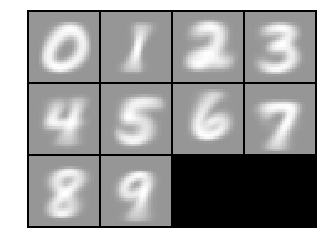

In [19]:
# display mean tagged digit set
z1 = np.concatenate([np.mean(X[y == i], axis=0) for i in range(10)])
display_data(z1.reshape((10,28*28)))

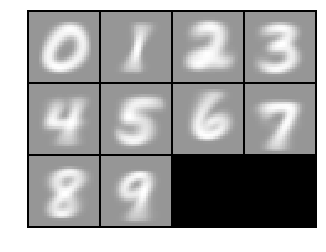

In [20]:
# display mean right recognized digit set
z3 = np.concatenate([np.mean(X[(y_pred == y) & (y == i)], axis=0) for i in range(10)])
display_data(z3.reshape((10,28*28)))

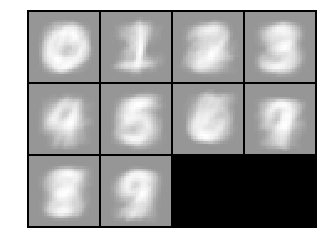

In [21]:
# display mean wrong recognized digit set
z3 = np.concatenate([np.mean(X[(y_pred != y) & (y == i)], axis=0) for i in range(10)])
display_data(z3.reshape((10,28*28)))

## Affichage de résultats sur le test set

In [22]:
# dernier algo utilisé
# prédiction sur le test set
y_pred = algo.predict(X_test)

9  5  4  7  9  4  9  8  3  5
8  6  1  9  5  5  0  0  3  3
9  3  9  3  3  9  2  2  1  8
6  8  6  7  3  9  5  8  5  8
5  1  1  6  1  2  7  4  3  5
0  3  6  8  2  3  8  1  1  2
6  1  3  6  8  5  0  2  6  9
6  4  6  4  2  8  4  1  6  8
3  0  9  6  9  1  4  1  8  9
3  1  8  4  6  3  4  3  5  1
----------------------------
.  .  .  .  .  .  .  .  .  .
.  .  .  .  6  .  .  .  .  .
2  .  .  5  .  .  .  .  .  .
.  .  .  .  .  .  .  .  .  .
.  .  9  .  .  .  .  .  .  .
.  .  .  .  .  .  .  .  .  .
.  .  .  .  .  .  .  .  .  .
.  .  .  .  .  .  .  .  .  .
.  .  .  .  .  .  0  .  .  .
.  .  .  .  .  .  .  .  .  .


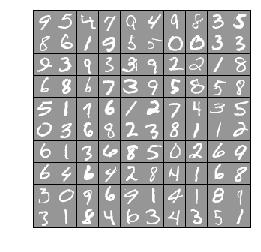

In [23]:
# affichage aléatoire de 100 chiffres et des tags associés
rnd = np.random.permutation(X_test.shape[0])[0:100]
sel = X_test[rnd,:] # 100 random digits
res = y_test[rnd]
pred = y_pred[rnd]
display_data(sel, res, pred)

## Prévisions sur une image fabriquée manuellement

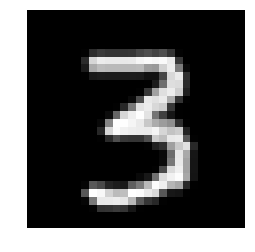

In [28]:
var = plt.imread("C:/Users/francis/Desktop/test.bmp")
plt.axis('off')
plt.imshow(var, cmap='gray');

In [31]:
# prédictions de chacun des algorithmes sur l'échantillon
sample = [var.flatten()/255]

for algo in algos:
    prediction = algo.predict(sample)[0]
    print(algo.__class__.__name__, prediction)

LogisticRegression 3.0
DecisionTreeClassifier 3.0
RandomForestClassifier 3.0
SGDClassifier 3.0
LinearSVC 3.0
MultinomialNB 3.0
MLPClassifier 3.0
